In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np


In [2]:
dim_customers=pd.read_csv('dataset\dim_customers.csv')
dim_date=pd.read_csv('dataset\dim_date.csv')
dim_products=pd.read_csv('dataset\dim_products.csv')
dim_targets_orders=pd.read_csv('dataset\dim_targets_orders.csv')
fact_order_lines = pd.read_csv("D:\\DA Projects\\Supply Chain Analysis\\dataset\\fact_order_lines.csv")
fact_orders_aggregate = pd.read_csv('D:\\DA Projects\\Supply Chain Analysis\\dataset\\fact_orders_aggregate.csv')


# Problem Statement
AtliQ Mart is a growing FMCG manufacturer headquartered in Gujarat, India. It is currently operational in three cities Surat, Ahmedabad and Vadodara. They want to expand to other metros/Tier 1 cities in the next 2 years.

AtliQ Mart is currently facing a problem where a few key customers did not extend their annual contracts due to service issues. It is speculated that some of the essential products were either not delivered on time or not delivered in full over a continued period, which could have resulted in bad customer service. Management wants to fix this issue before expanding to other cities and requested their supply chain analytics team to track the ’On time’ and ‘In Full’ delivery service level for all the customers daily basis so that they can respond swiftly to these issues.

The Supply Chain team decided to use a standard approach to measure the service level in which they will measure ‘On-time delivery (OT) %’, ‘In-full delivery (IF) %’, and OnTime in full (OTIF) %’ of the customer orders daily basis against the target service level set for each customer.

# Task:  
Peter Pandey is the data analyst in the supply chain team who joined AtliQ Mart recently. He has been briefed about the the task in the stakeholder business review meeting. Now imagine yourself as Peter Pandey and play the role of the new data analyst who is excited to build this dashboard and perform the following task:

Create the metrics according to the metrics list.
Create a dashboard according to the requirements provided by stakeholders in the business review meeting. You will be provided with the transcript of this business review meeting in comic form.
Create relevant insights not provided in the metric list/stakeholder meeting.
Other resources Provided:

Relevant Business Knowledge & explanations
Metadata
Peter Pandey’s notes taken during the stakeholder meeting
 


# Insights

-> On one hand, if the missing 450k products represent a small fraction of the total 13 million, it may be considered a relatively minor shortfall. However, if atliq has to expand its services pan india the number of delivery will keep on increasing and the ratio which is now 0.35 will also and the 450k missing products significantly impact operations or customer satisfaction, then it could be viewed as a notable shortfall. Evaluating against benchmarks and considering the broader impact on operations and customer satisfaction can provide a clearer assessment.

->A 59% on-time percentage suggests there's room for improvement before the atliq expands across different parts of india, as it falls below the desired benchmark of delivering on time. Several factors could contribute to this:

Supply Chain Bottlenecks: Delays in sourcing raw materials or components can disrupt production schedules, leading to late deliveries.
Production Issues: Machinery breakdowns, quality control problems, or production inefficiencies can delay the manufacturing process, affecting delivery schedules.
Transportation Challenges: Issues with logistics providers, such as capacity constraints, route inefficiencies, or transportation delays, can lead to late deliveries. When we see the monthly trends for on-time percentage there is a major fall in the month of june and july which is generally rainy season in vadodra so may be some arrangements can be done their.
Demand Variability: Fluctuations in customer demand or inaccurate demand forecasting can make it challenging to plan production and transportation schedules effectively.
Communication Breakdowns: Poor communication between stakeholders, such as suppliers, manufacturers, and distributors, can lead to misunderstandings and delays in the supply chain.

->A 53% in-full percentage indicates that slightly over half of the orders are being delivered complete, without any missing items. This suggests there are significant issues in the supply chain that need to be addressed to ensure orders are fulfilled accurately. Some major reasons for this could include:

Inventory Management: Inaccurate inventory tracking or stockouts of certain items may result in incomplete orders.
Order Fulfillment Errors: Mistakes in picking, packing, or shipping orders can lead to missing items or incorrect quantities being delivered.
Supplier Reliability: Unreliable suppliers failing to deliver all required items on time or in full can contribute to incomplete orders.
Transportation Issues: Damage or loss of products during transit can result in incomplete deliveries.
Quality Control Problems: Items may be rejected during quality control inspections, leading to delays or partial fulfillment of orders.

->A 29% On-Time In-Full (OTIF) percentage indicates significant challenges in both meeting delivery deadlines and ensuring complete order fulfillment. This low percentage suggests that a large portion of orders are not arriving on time or are arriving incomplete.

->A 66% Line Item Fill Rate (LIFR) suggests that about two-thirds of individual items within orders are successfully delivered. While this percentage is higher compared to the OTIF and In-Full percentages you provided earlier, there's still room for improvement.

Potential reasons for a 66% LIFR could include:

Inventory Accuracy: Inaccurate inventory records or stockouts of specific items can result in incomplete order fulfillment at the line item level.
Order Processing Errors: Mistakes in order processing, such as incorrect item selection or mislabeling, can lead to missing items within orders.
Supply Chain Disruptions: Unforeseen disruptions in the supply chain, such as supplier issues or transportation delays, may impact the availability of certain items for order fulfillment.
Quality Control Issues: Items may be rejected during quality inspections, leading to delays or partial fulfillment of orders.
To improve the LIFR, it's essential to focus on enhancing inventory management accuracy, optimizing order processing workflows, addressing supply chain disruptions proactively, and implementing robust quality control measures to ensure that all ordered items are successfully delivered. Additionally, investing in technologies like real-time inventory tracking and order management systems can help improve visibility and efficiency across the supply chain

->A VOF (Volume Order Fill) rate of 96.6% alongside lower OTIF (On-Time In-Full) and In-Full percentages indicates a discrepancy between the volume of items fulfilled and the completeness or timeliness of those fulfillments.

Possible explanations for this disparity might include:

Order Complexity: The high VOF rate suggests that a significant volume of items is being fulfilled, but orders may consist of numerous items, making it more challenging to ensure complete fulfillment and on-time delivery for each individual order.
Partial Order Fulfillment: The VOF rate may remain high because many orders are being partially fulfilled, with most items delivered, but some crucial items missing or delayed.
Timing of Fulfillment: While many orders are being fulfilled volumetrically, there may be delays or issues affecting the timeliness or completeness of those fulfillments, leading to lower OTIF and In-Full percentages.
To address these discrepancies and improve overall performance, it's crucial to focus on:

Enhancing order processing efficiency to ensure timely and complete fulfillment for each order.
Strengthening inventory management practices to reduce stockouts and inaccuracies.
Optimizing logistics and transportation operations to minimize delays and improve delivery performance.
Implementing robust quality control measures to prevent errors and ensure accurate order fulfillment.
Enhancing communication and collaboration across the supply chain to address issues proactively and improve overall performance metrics.




# Column Description for dim_customers:

This table contains all the information about customers

1. customer_id: Unique ID is given to each customer
2. customer_name: Name of the customer
3. city: It is the city where the customer is present

In [3]:
dim_customers.head()

,customer_id,customer_name,city
0,789201,Rel Fresh,Surat
1,789202,Rel Fresh,Ahmedabad
2,789203,Rel Fresh,Vadodara
3,789301,Expression Stores,Surat
4,789303,Expression Stores,Vadodara


# Column Description for dim_date:
This table contains the dates at daily, monthly level and week numbers of the year

1. date: date at the daily level
2. mmm_yy: date at the monthly level
3. week_no: week number of the year as per the date column

In [4]:
dim_date.head()

,date,mmm_yy,week_no
0,01-Apr-22,01-Apr-22,W 14
1,03-Apr-22,01-Apr-22,W 15
2,04-Apr-22,01-Apr-22,W 15
3,05-Apr-22,01-Apr-22,W 15
4,06-Apr-22,01-Apr-22,W 15


# Column Description for dim_products:
This table contains all the information about the products

1. product_name: It is the name of the product
2. product_id: Unique ID is given to each of the products
3. category: It is the class to which the product belongs

In [5]:
dim_products.head()

,product_name,product_id,category
0,AM Milk 500,25891101,Dairy
1,AM Milk 250,25891102,Dairy
2,AM Milk 100,25891103,Dairy
3,AM Butter 100,25891201,Dairy
4,AM Butter 250,25891202,Dairy


# Column Description for dim_targets_orders:
This table contains all target data at the customer level

1. customer_id: Unique ID that is given to each of the customers
2. ontime_target %: Target assigned for Ontime % for a given customer
3. infull_target %: Target assigned for infull % for a given customer
4. otif_target %:   Target assigned for otif % for a given customer

In [6]:
dim_targets_orders.head()

,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70
1,789202,85,81,69
2,789203,92,76,70
3,789301,89,78,69
4,789303,88,78,69


# Column Description for fact_order_lines:
This table contains all information about orders and each item inside the orders.

1. order_id: Unique ID for each order the customer placed
2. order_placement_date: It is the date when the customer placed the order
3. customer_id: Unique ID that is given to each of the customers
4. product_id: Unique ID that is given to each of the products
5. order_qty: It is the number of products requested by the customer to be delivered
6. agreed_delivery_date: It is the date agreed between the customer and Atliq Mart to deliver the products
7. actual_delivery_date: It is the actual date Atliq Mart delivered the product to the customer
8. delivered_qty: It is the number of products that are actually delivered to the customer


In [38]:
fact_order_lines.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,delivery_delay
0,FMR34203601,"Tuesday, March 1, 2022",789203,25891601,110,2022-03-04,2022-03-04,110,1,1,1,0
1,FMR32320302,"Tuesday, March 1, 2022",789320,25891203,347,2022-03-02,2022-03-02,347,1,1,1,0
2,FMR33320501,"Tuesday, March 1, 2022",789320,25891203,187,2022-03-03,2022-03-03,150,0,1,0,0
3,FMR34220601,"Tuesday, March 1, 2022",789220,25891203,235,2022-03-04,2022-03-04,235,1,1,1,0
4,FMR33703603,"Tuesday, March 1, 2022",789703,25891203,176,2022-03-03,2022-03-03,176,1,1,1,0


# Column Description for fact_orders_aggregate:
This table contains information about OnTime, InFull and OnTime Infull information aggregated at the order level per customer

1. order_id: Unique ID for each order the customer placed
2. customer_id: Unique ID that is given to each of the customers
3. order_placement_date: It is the date when the customer placed the order
4. on_time: '1' denotes the order is delviered on time. '0' denotes the order is not delivered on time.
5. in_full: '1' denotes the order is delviered in full quantity. '0' denotes the order is not delivered in full quantity.
6: otif:    '1' denotes the order is delviered both on time and in full quantity. '0' denotes the order is either not delivered on time or not in full quantity.

In [8]:
fact_orders_aggregate.head()

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,01-Mar-22,1,0,0
1,FMR34103403,789103,01-Mar-22,1,0,0
2,FMR32103602,789103,01-Mar-22,1,0,0
3,FMR33103602,789103,01-Mar-22,1,0,0
4,FMR33103401,789103,01-Mar-22,1,0,0


*Orders*: An order typically represents a single transaction made by a customer. It encompasses all the items the customer has decided to purchase in one go. An order usually contains information such as the customer's details, shipping address, payment method, and order status.

*Order lines*: Order lines, also known as line items, represent individual items within an order. Each order can have one or more order lines, depending on the number of distinct items purchased in that order. Order lines contain details about the specific item, such as its name, quantity, price, and any other relevant attributes.

Total Orders placed in the year 2022 

In [9]:
total_orders = fact_orders_aggregate.shape[0]

print("Total Orders:", total_orders)

Total Orders: 31729


There are 57,096 individual items that have been ordered across various transactions. 

In [10]:
total_order_lines = fact_order_lines.shape[0]

print("Total Order Lines:", total_order_lines)

Total Order Lines: 57096


The total quantity that are ordered in 57,096 order line is 13426936

In [11]:
total_ordered_quantity = fact_order_lines['order_qty'].sum()

print("Total Ordered Quantity:", total_ordered_quantity)

Total Ordered Quantity: 13426936


The total Quantity that are delivered with respect to ordered quantity

In [12]:
total_delivered_quantity = fact_order_lines['delivery_qty'].sum()

print("Total Delivered Quantity:", total_delivered_quantity)

Total Delivered Quantity: 12969157


The left over products that have not been delivered calculated by substracting total delivered products from total ordered products

Our in-depth analysis reveals that out of the vast array of 13 million products ordered, approximately 450,000 are currently pending delivery, representing a mere 0.035% of the total volume. While this figure denotes a minor fraction, we acknowledge that each undelivered item signifies a potential hiccup in the customer journey. Through ongoing evaluation and optimization of our logistics framework, we are committed to minimizing such occurrences, ensuring seamless and satisfying experiences for all customers.

In [13]:
print("Products Not delivered: ",total_ordered_quantity-total_delivered_quantity)

Products Not delivered:  457779


The On-time percentage represents how many products have been delivered on time out of 100

In [14]:
OT_Orders = fact_orders_aggregate['on_time'].sum()
Total_Orders = fact_orders_aggregate.shape[0]

OT_Percentage = round((OT_Orders / Total_Orders) * 100)

print("OT Percentage:", OT_Percentage,"%")

OT Percentage: 59 %


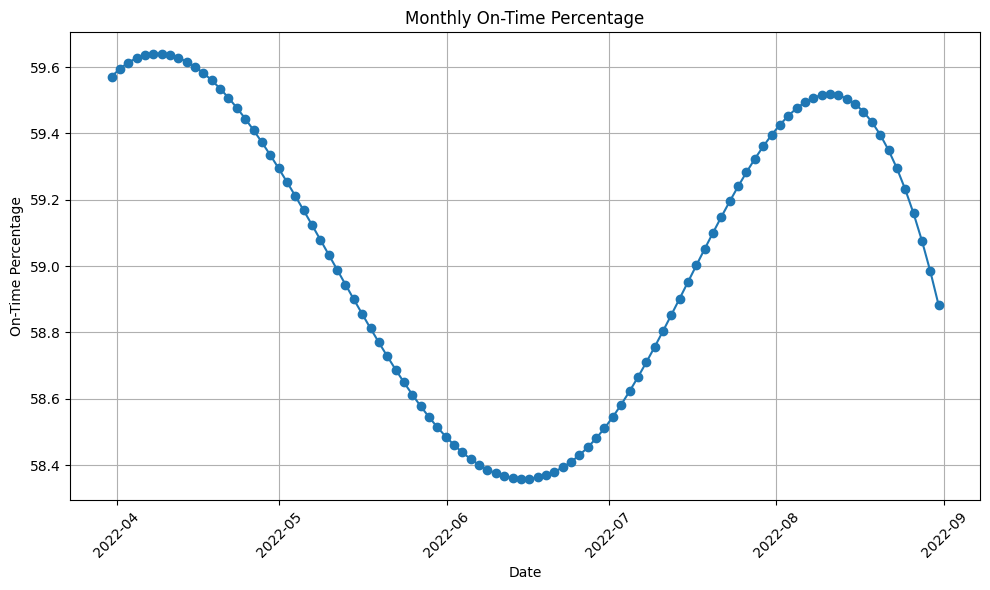

In [15]:
merged_df = pd.merge(fact_orders_aggregate, dim_date, left_on='order_placement_date', right_on='date')

merged_df['date'] = pd.to_datetime(merged_df['date'], format='%d-%b-%y')

monthly_totals = merged_df.groupby(pd.Grouper(key='date', freq='M'))['on_time'].count()
monthly_on_time = merged_df.groupby(pd.Grouper(key='date', freq='M'))['on_time'].sum()
monthly_percentage = (monthly_on_time / monthly_totals) * 100

x = pd.date_range(monthly_percentage.index.min(), monthly_percentage.index.max(), periods=100)
y = make_interp_spline(monthly_percentage.index, monthly_percentage.values)(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Monthly On-Time Percentage')
plt.xlabel('Date')
plt.ylabel('On-Time Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The "In-Full Percentage" reflects the proportion of orders that have been flawlessly delivered, with every product reaching its destination without any shortfall.

In [16]:
IF_Orders = fact_orders_aggregate['in_full'].sum()
Total_Orders = fact_orders_aggregate.shape[0]

IF_Percentage = round((IF_Orders / Total_Orders) * 100)

print("IF Percentage:", IF_Percentage,"%")

IF Percentage: 53 %


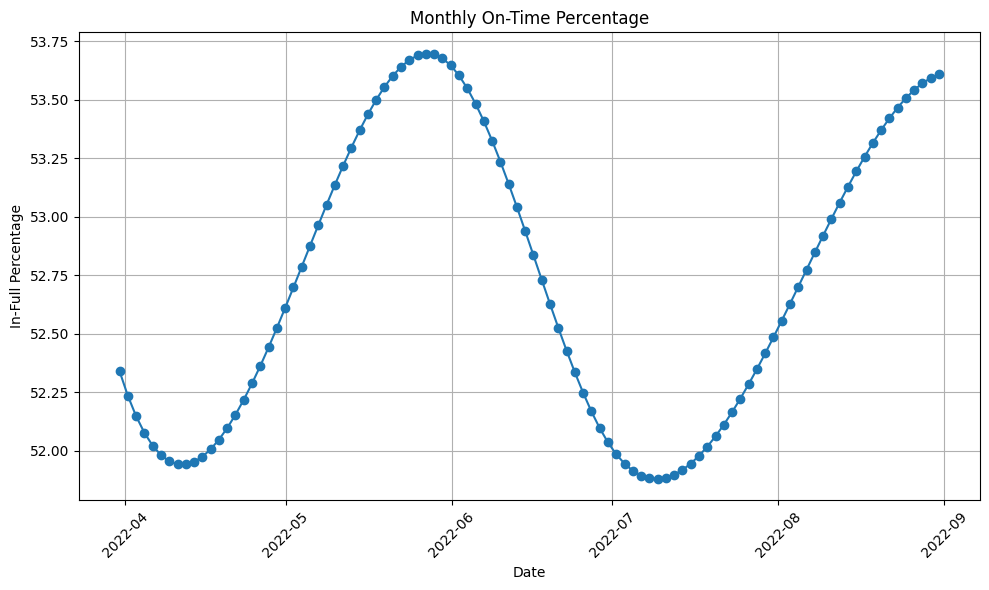

In [17]:
merged_df = pd.merge(fact_orders_aggregate, dim_date, left_on='order_placement_date', right_on='date')

merged_df['date'] = pd.to_datetime(merged_df['date'], format='%d-%b-%y')

monthly_totals = merged_df.groupby(pd.Grouper(key='date', freq='M'))['in_full'].count()
monthly_in_full= merged_df.groupby(pd.Grouper(key='date', freq='M'))['in_full'].sum()
monthly_percentage = (monthly_in_full / monthly_totals) * 100

x = pd.date_range(monthly_percentage.index.min(), monthly_percentage.index.max(), periods=100)
y = make_interp_spline(monthly_percentage.index, monthly_percentage.values)(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Monthly On-Time Percentage')
plt.xlabel('Date')
plt.ylabel('In-Full Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The "On-Time In-Full" (OTIF) metric epitomizes operational excellence, showcasing the percentage of orders delivered both promptly and completely, without any delays or missing items.

In [18]:
OTIF_Orders = fact_orders_aggregate['otif'].sum()
Total_Orders = fact_orders_aggregate.shape[0]

OTIF_Percentage = round((OTIF_Orders / Total_Orders) * 100)

print("OTIF Percentage:", OTIF_Percentage,"%")

OTIF Percentage: 29 %


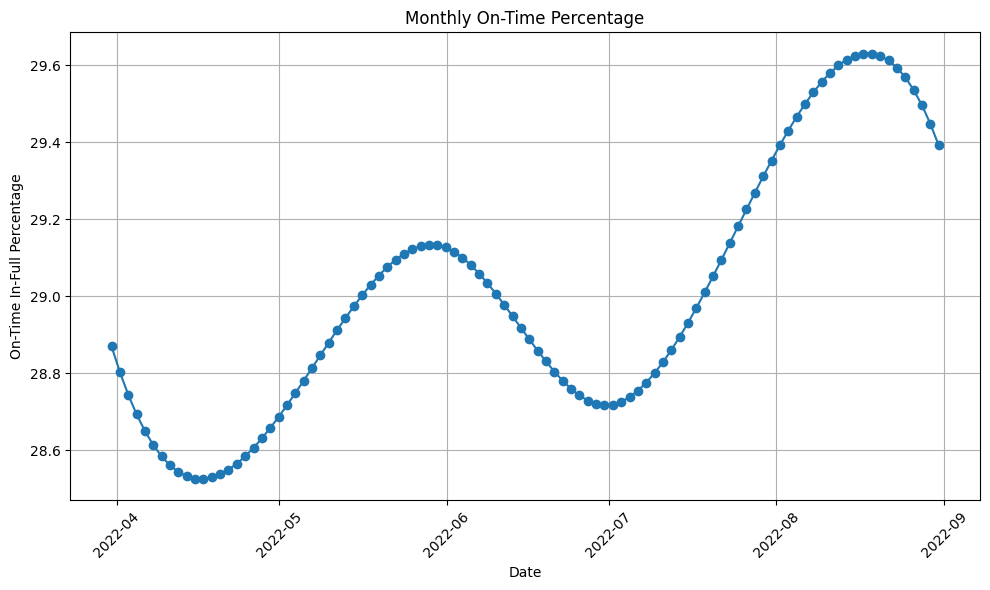

In [19]:
merged_df = pd.merge(fact_orders_aggregate, dim_date, left_on='order_placement_date', right_on='date')

merged_df['date'] = pd.to_datetime(merged_df['date'], format='%d-%b-%y')

monthly_totals = merged_df.groupby(pd.Grouper(key='date', freq='M'))['otif'].count()
monthly_otif= merged_df.groupby(pd.Grouper(key='date', freq='M'))['otif'].sum()
monthly_percentage = (monthly_otif / monthly_totals) * 100

x = pd.date_range(monthly_percentage.index.min(), monthly_percentage.index.max(), periods=100)
y = make_interp_spline(monthly_percentage.index, monthly_percentage.values)(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Monthly On-Time Percentage')
plt.xlabel('Date')
plt.ylabel('On-Time In-Full Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
average_ontime_target_percentage = round(dim_targets_orders['ontime_target%'].mean())

print("Average Ontime Target Percentage:", average_ontime_target_percentage,"%")

Average Ontime Target Percentage: 86 %


In [21]:
average_infull_target_percentage = round(dim_targets_orders['infull_target%'].mean())

print("Average infull Target Percentage:", average_infull_target_percentage,"%")

Average infull Target Percentage: 77 %


In [22]:
average_otif_target_percentage = round(dim_targets_orders['otif_target%'].mean())

print("Average Ontime infull Target Percentage:", average_otif_target_percentage,"%")

Average Ontime infull Target Percentage: 66 %


In [23]:
LIF = fact_order_lines[fact_order_lines['In Full'] == 1].shape[0]

total_rows = fact_order_lines.shape[0]

LIFR_percentage = round((LIF / total_rows) * 100)

print("LIFR Percentage:", LIFR_percentage,"%")

LIFR Percentage: 66 %


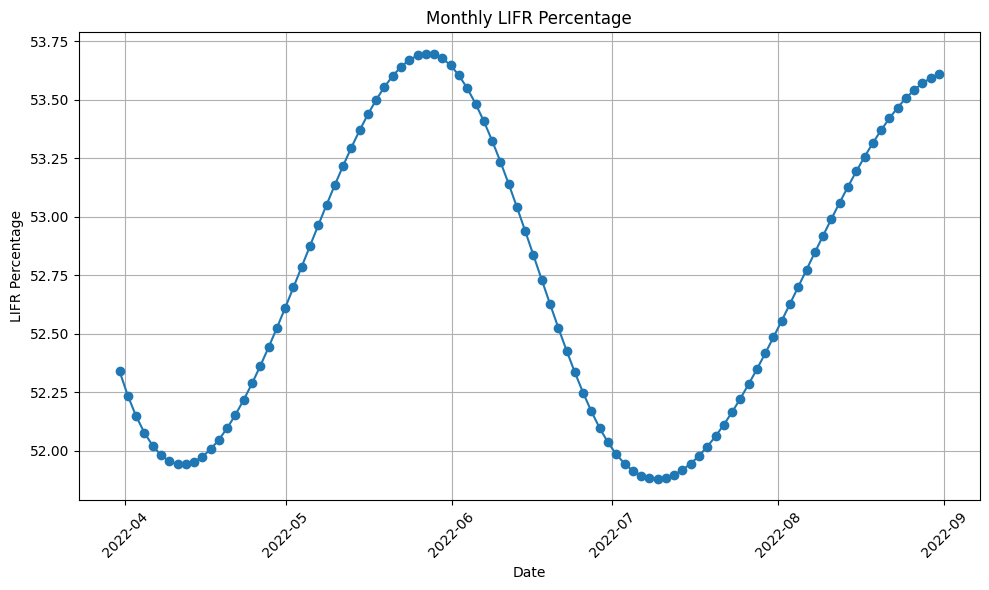

In [24]:
merged_df = pd.merge(fact_orders_aggregate, dim_date, left_on='order_placement_date', right_on='date')

merged_df['date'] = pd.to_datetime(merged_df['date'], format='%d-%b-%y')

monthly_LIF = merged_df.groupby(pd.Grouper(key='date', freq='M'))['in_full'].sum()
monthly_total_rows = merged_df.groupby(pd.Grouper(key='date', freq='M'))['in_full'].count()

monthly_LIFR_percentage = (monthly_LIF / monthly_total_rows) * 100

x_smooth = pd.date_range(monthly_LIFR_percentage.index.min(), monthly_LIFR_percentage.index.max(), periods=100)
y_smooth = make_interp_spline(monthly_LIFR_percentage.index, monthly_LIFR_percentage.values)(x_smooth)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, marker='o', linestyle='-')
plt.title('Monthly LIFR Percentage')
plt.xlabel('Date')
plt.ylabel('LIFR Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
Total_QTY_ORD = fact_order_lines['order_qty'].sum()
Total_QTY_DEL = fact_order_lines['delivery_qty'].sum()

VOFR_percentage = round((Total_QTY_DEL / Total_QTY_ORD) * 100)

print("VOFR Percentage:", VOFR_percentage,"%")

VOFR Percentage: 97 %


In [26]:
merged_data = pd.merge(fact_orders_aggregate, dim_customers, on='customer_id')
result = merged_data.groupby('city').agg(Total_Orders=('customer_id', 'count')).reset_index()

print(result)

        city  Total_Orders
0  Ahmedabad         11061
1      Surat          9696
2   Vadodara         10972


In [27]:
merged_data = pd.merge(fact_orders_aggregate, dim_customers, on='customer_id')

merged_data['OT_Orders'] = merged_data['on_time'].apply(lambda x: 1 if x == 1 else 0)

result = merged_data.groupby('city')['OT_Orders'].sum().reset_index()

print(result)

        city  OT_Orders
0  Ahmedabad       6433
1      Surat       5935
2   Vadodara       6362


In [28]:
merged_data = pd.merge(fact_orders_aggregate, dim_customers, on='customer_id')

merged_data['IF_Orders'] = merged_data['in_full'].apply(lambda x: 1 if x == 1 else 0)

result = merged_data.groupby('city')['IF_Orders'].sum().reset_index()

print(result)

        city  IF_Orders
0  Ahmedabad       5995
1      Surat       5095
2   Vadodara       5657


In [29]:
merged_data = pd.merge(fact_orders_aggregate, dim_customers, on='customer_id')

merged_data['OTIF_Orders'] = merged_data['otif'].apply(lambda x: 1 if x == 1 else 0)

result = merged_data.groupby('city')['OTIF_Orders'].sum().reset_index()

print(result)

        city  OTIF_Orders
0  Ahmedabad         3244
1      Surat         2916
2   Vadodara         3048


In [30]:
fact_order_lines['agreed_delivery_date'] = pd.to_datetime(fact_order_lines['agreed_delivery_date'])
fact_order_lines['actual_delivery_date'] = pd.to_datetime(fact_order_lines['actual_delivery_date'])

fact_order_lines['delivery_delay'] = (fact_order_lines['actual_delivery_date'] - fact_order_lines['agreed_delivery_date']).dt.days

result = fact_order_lines.groupby('delivery_delay')['order_id'].count().reset_index()

result.columns = ['count', 'delivery_delay']

print(result)

   count  delivery_delay
0     -1            3607
1      0           36998
2      1            8255
3      2            5136
4      3            3100


In [31]:
merged_data = pd.merge(fact_orders_aggregate, dim_customers, on='customer_id')

OT_Counts = merged_data.groupby('city').agg(OT_Orders=('on_time', lambda x: sum(x == 1)),
                                            Total_Orders=('order_id', 'count')).reset_index()

OT_Counts['OT_Percentage'] = round((OT_Counts['OT_Orders'] / OT_Counts['Total_Orders']) * 100, 0)

result = OT_Counts[['city', 'OT_Percentage']]

print(result)

        city  OT_Percentage
0  Ahmedabad           58.0
1      Surat           61.0
2   Vadodara           58.0


In [32]:
merged_data = pd.merge(fact_orders_aggregate, dim_customers, on='customer_id')

IF_Counts = merged_data.groupby('city').agg(IF_Orders=('in_full', lambda x: sum(x == 1)),
                                            Total_Orders=('order_id', 'count')).reset_index()

IF_Counts['IF_Percentage'] = round((IF_Counts['IF_Orders'] / IF_Counts['Total_Orders']) * 100, 0)

result = IF_Counts[['city', 'IF_Percentage']]

print(result)

        city  IF_Percentage
0  Ahmedabad           54.0
1      Surat           53.0
2   Vadodara           52.0


In [33]:
merged_data = pd.merge(fact_orders_aggregate, dim_customers, on='customer_id')

OTIF_Counts = merged_data.groupby('city').agg(OTIF_Orders=('otif', lambda x: sum(x == 1)),
                                              Total_Orders=('order_id', 'count')).reset_index()

OTIF_Counts['IF_Percentage'] = round((OTIF_Counts['OTIF_Orders'] / OTIF_Counts['Total_Orders']) * 100, 0)

result = OTIF_Counts[['city', 'IF_Percentage']]

print(result)

        city  IF_Percentage
0  Ahmedabad           29.0
1      Surat           30.0
2   Vadodara           28.0


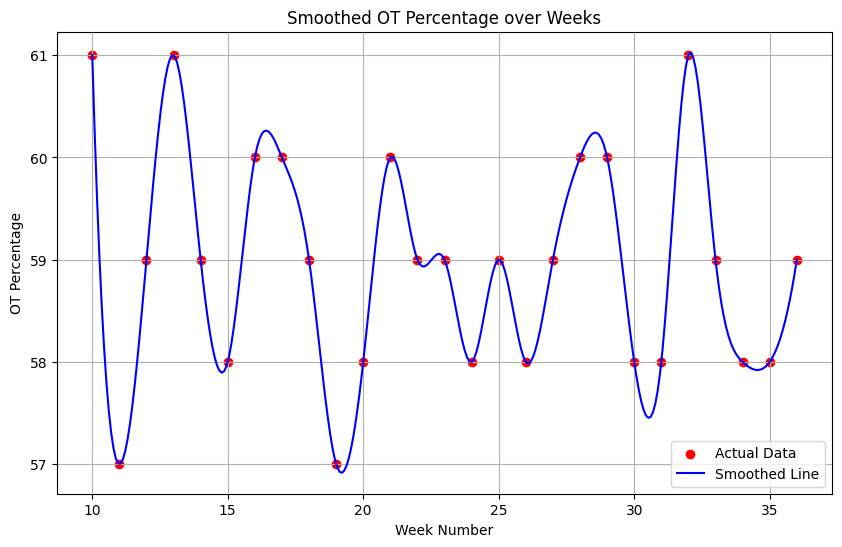

In [34]:
merged_data = pd.merge(fact_orders_aggregate, dim_date, left_on='order_placement_date', right_on='date')

OT_Counts = merged_data.groupby('week_no').agg(OT_Orders=('on_time', lambda x: sum(x == 1)),
                                               Total_Orders=('order_id', 'count')).reset_index()

OT_Counts['OT_Percentage'] = round((OT_Counts['OT_Orders'] / OT_Counts['Total_Orders']) * 100, 0)

OT_Counts['week_no'] = OT_Counts['week_no'].str.split(' ').str[1]

OT_Counts['week_no'] = pd.to_numeric(OT_Counts['week_no'])

OT_Counts = OT_Counts.sort_values(by='week_no')

x_smooth = OT_Counts['week_no']
y_smooth = OT_Counts['OT_Percentage']
x_smooth_new = np.linspace(x_smooth.min(), x_smooth.max(), 300)
y_smooth_new = make_interp_spline(x_smooth, y_smooth)(x_smooth_new)

plt.figure(figsize=(10, 6))
plt.scatter(OT_Counts['week_no'], OT_Counts['OT_Percentage'], color='red', label='Actual Data')

plt.plot(x_smooth_new, y_smooth_new, color='blue', label='Smoothed Line')
plt.title('Smoothed OT Percentage over Weeks')
plt.xlabel('Week Number')
plt.ylabel('OT Percentage')
plt.legend()
plt.grid(True)
plt.show()

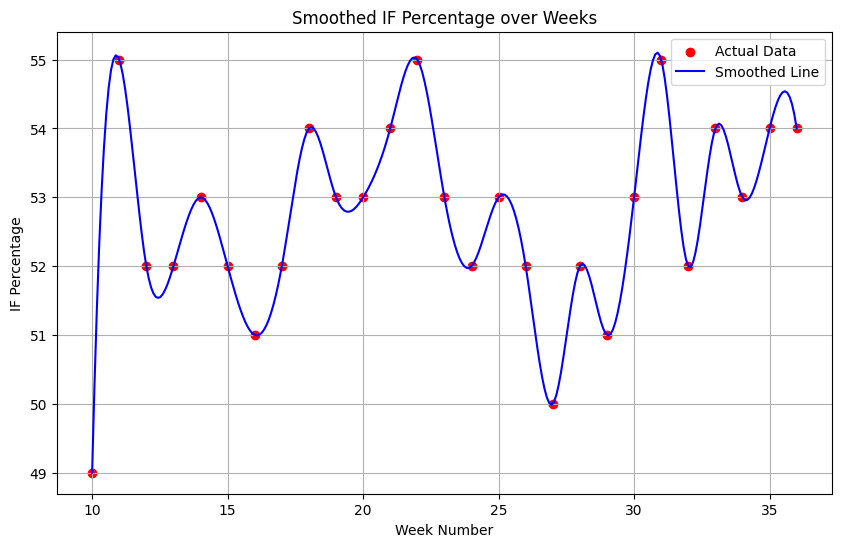

In [35]:
merged_data = pd.merge(fact_orders_aggregate, dim_date, left_on='order_placement_date', right_on='date')

IF_Counts = merged_data.groupby('week_no').agg(IF_Orders=('in_full', lambda x: sum(x == 1)),
                                               Total_Orders=('order_id', 'count')).reset_index()

IF_Counts['IF_Percentage'] = round((IF_Counts['IF_Orders'] / IF_Counts['Total_Orders']) * 100, 0)

IF_Counts['week_no'] = IF_Counts['week_no'].str.split(' ').str[1]

IF_Counts['week_no'] = pd.to_numeric(IF_Counts['week_no'])

IF_Counts = IF_Counts.sort_values(by='week_no')

x_smooth = IF_Counts['week_no']
y_smooth = IF_Counts['IF_Percentage']
x_smooth_new = np.linspace(x_smooth.min(), x_smooth.max(), 300)
y_smooth_new = make_interp_spline(x_smooth, y_smooth)(x_smooth_new)

plt.figure(figsize=(10, 6))
plt.scatter(IF_Counts['week_no'], IF_Counts['IF_Percentage'], color='red', label='Actual Data')

plt.plot(x_smooth_new, y_smooth_new, color='blue', label='Smoothed Line')
plt.title('Smoothed IF Percentage over Weeks')
plt.xlabel('Week Number')
plt.ylabel('IF Percentage')
plt.legend()
plt.grid(True)
plt.show()


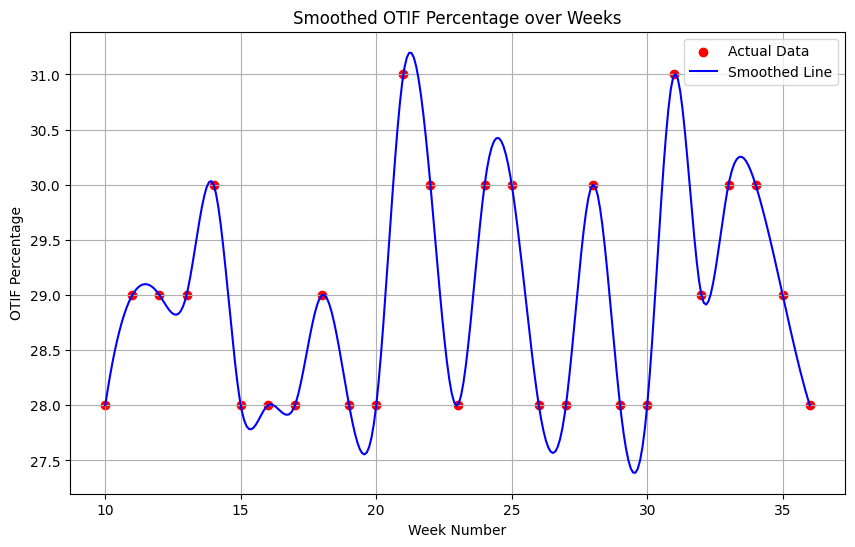

In [36]:
merged_data = pd.merge(fact_orders_aggregate, dim_date, left_on='order_placement_date', right_on='date')

OTIF_Counts = merged_data.groupby('week_no').agg(OTIF_Orders=('otif', lambda x: sum(x == 1)),
                                               Total_Orders=('order_id', 'count')).reset_index()

OTIF_Counts['OTIF_Percentage'] = round((OTIF_Counts['OTIF_Orders'] / OTIF_Counts['Total_Orders']) * 100, 0)

OTIF_Counts['week_no'] = OTIF_Counts['week_no'].str.split(' ').str[1]

OTIF_Counts['week_no'] = pd.to_numeric(OTIF_Counts['week_no'])

OTIF_Counts = OTIF_Counts.sort_values(by='week_no')

x_smooth = OTIF_Counts['week_no']
y_smooth = OTIF_Counts['OTIF_Percentage']
x_smooth_new = np.linspace(x_smooth.min(), x_smooth.max(), 300)
y_smooth_new = make_interp_spline(x_smooth, y_smooth)(x_smooth_new)

plt.figure(figsize=(10, 6))
plt.scatter(OTIF_Counts['week_no'], OTIF_Counts['OTIF_Percentage'], color='red', label='Actual Data')

plt.plot(x_smooth_new, y_smooth_new, color='blue', label='Smoothed Line')
plt.title('Smoothed OTIF Percentage over Weeks')
plt.xlabel('Week Number')
plt.ylabel('OTIF Percentage')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
fact_order_lines['order_placement_date'] = pd.to_datetime(fact_order_lines['order_placement_date'])

# Formatting the date column
fact_order_lines['order_placement_date'] = fact_order_lines['order_placement_date'].dt.strftime('%d-%b-%y')

In [44]:
fact_order_lines

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,delivery_delay
0,FMR34203601,01-Mar-22,789203,25891601,110,2022-03-04,2022-03-04,110,1,1,1,0
1,FMR32320302,01-Mar-22,789320,25891203,347,2022-03-02,2022-03-02,347,1,1,1,0
2,FMR33320501,01-Mar-22,789320,25891203,187,2022-03-03,2022-03-03,150,0,1,0,0
3,FMR34220601,01-Mar-22,789220,25891203,235,2022-03-04,2022-03-04,235,1,1,1,0
4,FMR33703603,01-Mar-22,789703,25891203,176,2022-03-03,2022-03-03,176,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
57091,FAUG831420303,30-Aug-22,789420,25891303,24,2022-08-31,2022-08-30,24,1,1,1,-1
57092,FAUG831122303,30-Aug-22,789122,25891303,67,2022-08-31,2022-08-31,54,0,1,0,0
57093,FAUG831702303,30-Aug-22,789702,25891303,41,2022-08-31,2022-08-30,37,0,1,0,-1
57094,FAUG831221503,30-Aug-22,789221,25891303,92,2022-08-31,2022-08-31,83,0,1,0,0


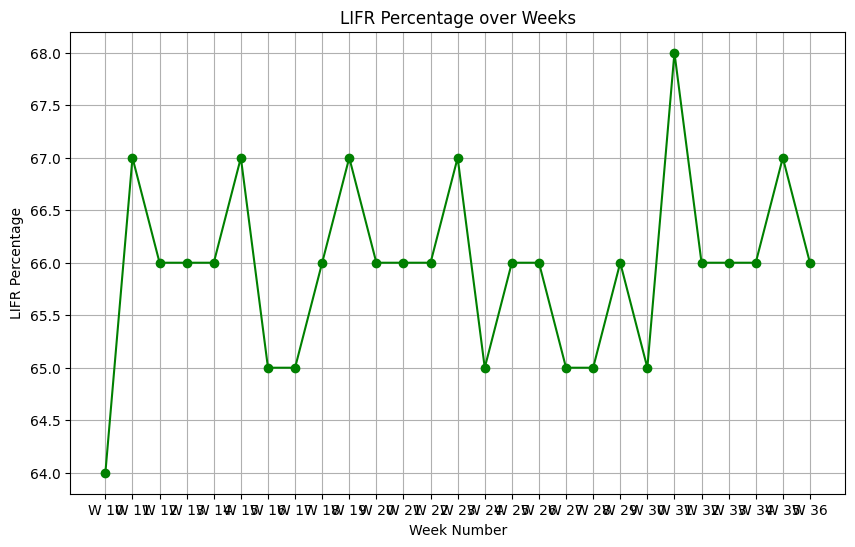

In [47]:
cte = fact_order_lines[fact_order_lines['In Full'] == 1].merge(dim_date, left_on='order_placement_date', right_on='date')
cte = cte.groupby('week_no').size().reset_index(name='lif')

total_orders = fact_order_lines.merge(dim_date, left_on='order_placement_date', right_on='date')
total_orders = total_orders.groupby('week_no').size().reset_index(name='total_count')

merged_df = cte.merge(total_orders, on='week_no')

merged_df['lifr%'] = round((merged_df['lif'] / merged_df['total_count']) * 100, 0)

result = merged_df[['week_no', 'lifr%']]

plt.figure(figsize=(10, 6))
plt.plot(result['week_no'], result['lifr%'], marker='o', color='green')
plt.title('LIFR Percentage over Weeks')
plt.xlabel('Week Number')
plt.ylabel('LIFR Percentage')
plt.grid(True)
plt.show()


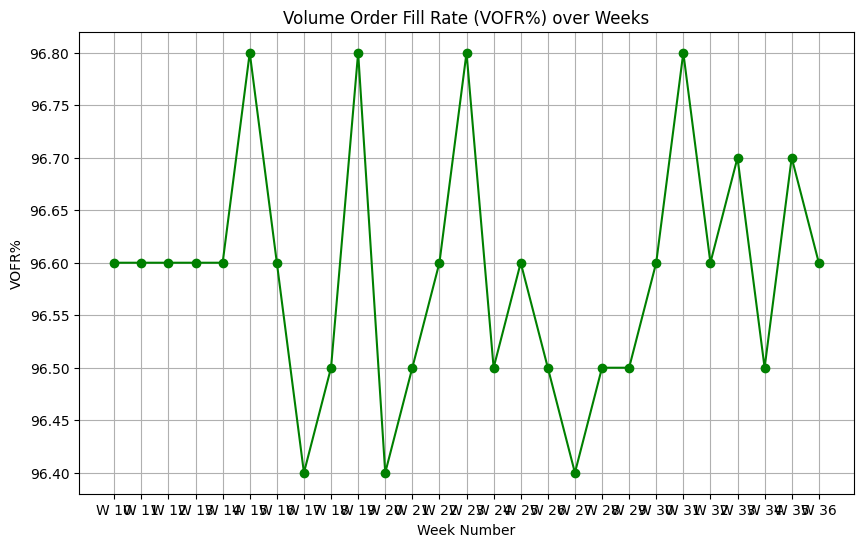

In [49]:
merged_data = fact_order_lines.merge(dim_date, left_on='order_placement_date', right_on='date')
grouped_data = merged_data.groupby('week_no').agg(Total_QTY_ORD=('order_qty', 'sum'),
                                                  Total_QTY_DEL=('delivery_qty', 'sum')).reset_index()

grouped_data['VOFR%'] = round((grouped_data['Total_QTY_DEL'] / grouped_data['Total_QTY_ORD']) * 100, 1)

result = grouped_data[['week_no', 'VOFR%']]

plt.figure(figsize=(10, 6))
plt.plot(result['week_no'], result['VOFR%'], marker='o', color='green', linestyle='-')
plt.title('Volume Order Fill Rate (VOFR%) over Weeks')
plt.xlabel('Week Number')
plt.ylabel('VOFR%')
plt.grid(True)
plt.show()